In [1]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", "surround_inhibition", "supercomputer", "networks")

In [3]:
folder = "voltage_traces"

In [4]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty_voltage_clamp.hdf5")
e.add_experiment(name="p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1_voltage_clamp.hdf5")


   

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty_voltage_clamp.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1_voltage_clamp.hdf5


In [49]:
t = sl.get_time()['p1']

In [50]:
name = os.path.join(external, "pdc_network_2022-08-31", "simulation", "voltage_clamp_network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty_voltage_clamp.hdf5")

In [51]:
hf = h5py.File(name)

In [52]:
data = dict()

In [53]:
for i in range(321):
    try:
        key_list = hf[f"i_key{i}"][:]
        data_list = hf[f"i_save_{i}"][:]
        for i, k in enumerate(key_list):
            if k not in data:
                data.update({k : data_list[i]})
    except:
        pass

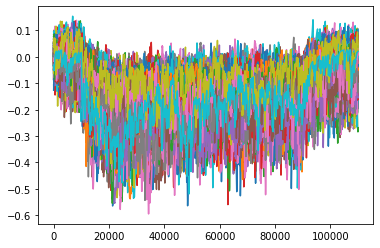

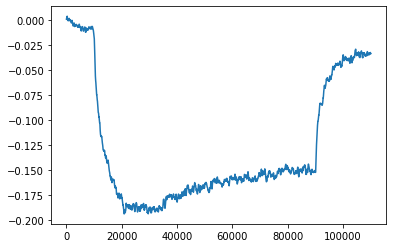

In [54]:
vss_c = list()
for k, v in data.items():
    plt.plot(v[10000:] - np.mean(v[10000:12000]))
    vss_c.append(v[10000:] - np.mean(v[10000:12000]))
plt.figure()
plt.plot(np.mean(vss_c,axis=0))
control = np.min(np.mean(vss_c,axis=0))

In [55]:
name = os.path.join(external, "pdc_network_2022-08-31", "simulation", "voltage_clamp_network_output_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1_voltage_clamp.hdf5")

In [56]:
hf = h5py.File(name)

In [57]:
data = dict()

In [58]:
for i in range(321):
    try:
        key_list = hf[f"i_key{i}"][:]
        data_list = hf[f"i_save_{i}"][:]
        for i, k in enumerate(key_list):
            if k not in data:
                data.update({k : data_list[i]})
    except:
        pass

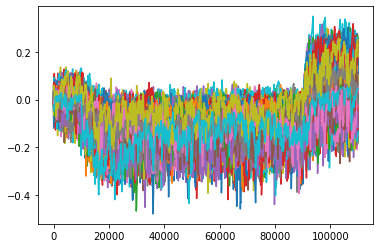

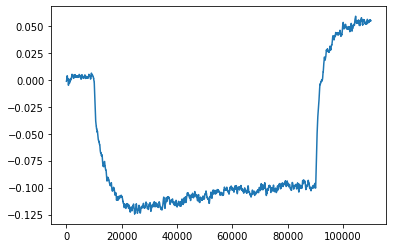

In [59]:
vss = list()
for k, v in data.items():
    plt.plot(v[10000:] - np.mean(v[10000:12000]))
    vss.append(v[10000:] - np.mean(v[10000:12000]))
plt.figure()
plt.plot(np.mean(vss,axis=0))
inhibition = np.min(np.mean(vss,axis=0))

In [60]:
name = os.path.join(external, "pdc_network_2022-08-31", "simulation", "voltage_clamp_network_output_input-spikes_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1_voltage_clamp.hdf5")

In [61]:
hf = h5py.File(name)

In [62]:
data = dict()

In [63]:
for i in range(321):
    try:
        key_list = hf[f"i_key{i}"][:]
        data_list = hf[f"i_save_{i}"][:]
        for i, k in enumerate(key_list):
            if k not in data:
                data.update({k : data_list[i]})
    except:
        pass

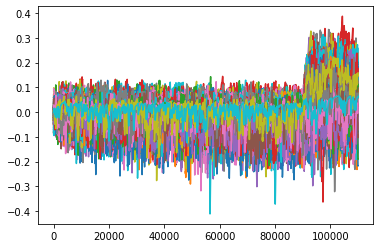

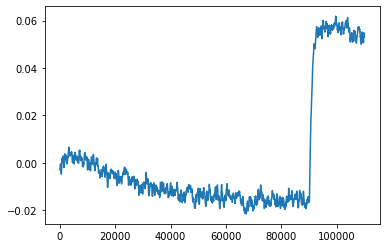

In [64]:
vss_i = list()
for k, v in data.items():
    plt.plot(v[10000:] - np.mean(v[10000:12000]))
    vss_i.append(v[10000:] - np.mean(v[10000:12000]))
plt.figure()
plt.plot(np.mean(vss_i,axis=0))
inhibitiono = np.min(np.mean(vss_i,axis=0))

In [65]:
t = np.arange(len(v)) * 2.5e-5

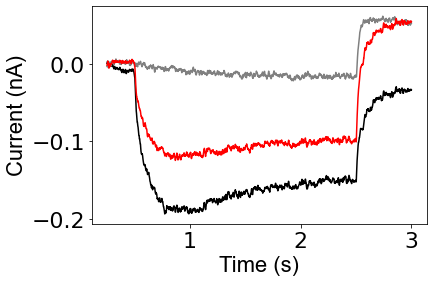

In [66]:
csfont = {"fontname": "Arial",
          'fontsize': 22}
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.plot(t[10000:],np.mean(vss_c,axis=0), c="black")
plt.plot(t[10000:],np.mean(vss_i,axis=0), c="grey")
plt.plot(t[10000:],np.mean(vss,axis=0), c="red")
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)
plt.xlabel("Time (s)", **csfont)
plt.ylabel("Current (nA)", **csfont)
plt.savefig(os.path.join("voltage_clamp", "normalized_voltage_clamp_current_vs_t.svg"))

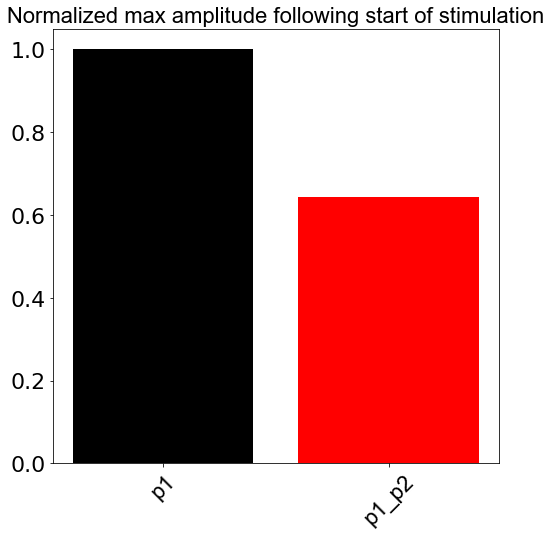

In [67]:
csfont = {"fontname": "Arial",
          'fontsize': 22}
pos = [0,1]
experiment_names = e.get_experiment_names()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.bar(pos,[control / control, inhibition / control], color=["black", "red"])
ax.set_xticks(pos, **csfont)
ax.set_xticklabels(experiment_names, rotation=45, **csfont)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)
plt.title("Normalized max amplitude following start of stimulation", **csfont)
plt.savefig(os.path.join("voltage_clamp", "normalized_max_amplitude_voltage_clamp.svg"))